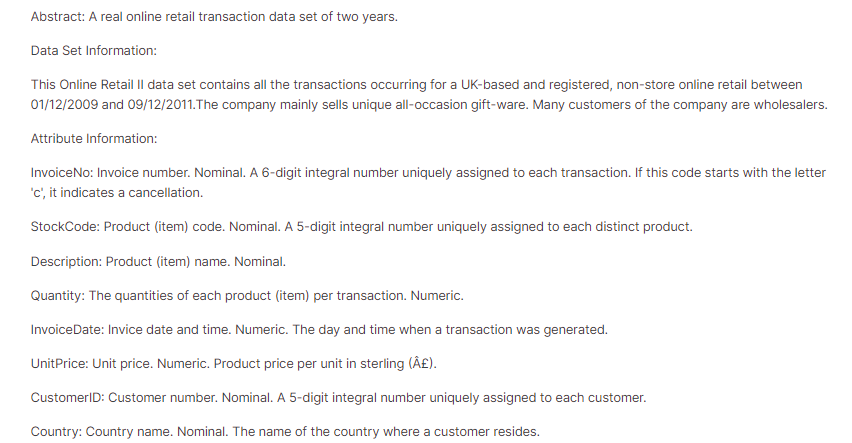

## Step 1: Import the required libraries



In [1]:
#pip install mlxtend

In [1]:
import numpy as np  
import pandas as pd  
from mlxtend.frequent_patterns import apriori, association_rules

## Step 2: Load and explore the data



> Data : https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset

In [9]:
# Now, we will load the Data  
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name= 'Year 2010-2011')
data1.head()  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Step 3: Clean the Data



In [19]:
# here, we will strip the extra spaces in the description  
data1['Description'] = data1['Description'].str.strip()  
  
# Now, drop the rows which does not have any invoice number  
data1.dropna(axis = 0, subset = ['Invoice'], inplace = True)  
data1['Invoice'] = data1['Invoice'].astype('str')  

data1 = data1[~data1['Invoice'].str.contains('C')]  

## Step 4: Split the data according to the region of transaction



In [88]:
data1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [95]:
data1[data1['Country'] == "France"].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Transactions done in France  
basket1_France = (data1[data1['Country'] == "France"]
        .groupby(['Invoice', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('Invoice'))  
  
# Transactions done in Portugal  
basket1_Por = (data1[data1['Country'] == "Portugal"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('Invoice'))  

## Step 5: Hot encoding the Data



In [48]:
# Here, we will define the hot encoding function   
# for making the data suitable  
# for the concerned libraries  
def hot_encode1(P):
    if(P<= 0):
        return 0 
    if(P>= 1):
        return 1

In [50]:
basket1_encoded = basket1_France.applymap(hot_encode1)  
basket1_France = basket1_encoded
basket1_France

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 6: Build the models and analyse the results



### a) France:

In [99]:
# Build the model 
frq_items1 = apriori(basket1_France, min_support = 0.05, use_colnames = True)
  
# Collect the inferred rules in a dataframe
rules1 = association_rules(frq_items1, metric = "lift", min_threshold = 1)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending = [False, False])
print(rules1)

                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
262  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
274  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
306  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
304  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   
..                                                 ...   
27                                           (POSTAGE)   
95                                           (POSTAGE)   
225                                          (POSTAGE)   
254                                          (POSTAGE)   
212                                          (POSTAGE)   

                                           consequents  antecedent support  \
45                                           (POSTAGE)            0.076531   
262                                          (POSTAGE)            0.051020   
274                                          (POSTAGE)            0.0

C:\Users\lenovo\.conda\envs\DS\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [103]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,0.767857,0.076531,1.000,1.302326,0.017766,inf,0.251381
262,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051020,0.767857,0.051020,1.000,1.302326,0.011844,inf,0.244624
274,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.053571,0.767857,0.053571,1.000,1.302326,0.012436,inf,0.245283
306,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975,7.644000,0.086474,34.897959,0.967949
304,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975,7.077778,0.085433,34.489796,0.956294


### Your Task --> Apply Apriori algorithm on another country and compary top products being purchased together from these two different countries